In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Separate Protein IDs with Q-value and Score

In [18]:
#read the CSV file into a dataframe. 
df= pd.read_csv('pG_classic_no_grouping_no_remap.csv')

#select the column you want to keep
columns_to_keep = ['Protein IDs', 'Q-value', 'Score']
new_df= df[columns_to_keep]
print(new_df)

#print(new_df)
new_df.to_csv('ProteinIDs_classic_no_grouping_no_remapwithScore.csv', index= False)

                      Protein IDs   Q-value      Score
0            sp|P35527|K1C9_HUMAN  0.000535  18.661526
1            sp|P35908|K22E_HUMAN  0.000535  17.132790
2           sp|P67809|YBOX1_HUMAN  0.000535  16.793147
3           sp|P09972|ALDOC_HUMAN  0.000535  16.784376
4           sp|P14550|AK1A1_HUMAN  0.000535  15.734628
...                           ...       ...        ...
55581      sp|Q9HD23-2|MRS2_HUMAN  1.060459   0.000000
55582    sR|single_ribo2783_HUMAN  1.060459   0.000000
55583   REV__sp|O14598|VCY1_HUMAN  1.060496   0.000000
55584     REV__sR|single_ribo3311  1.060533   0.000000
55585  REV__sp|Q9NY25|CLC5A_HUMAN  1.060570   0.000000

[55586 rows x 3 columns]


In [19]:
df = pd.read_csv('ProteinIDs_classic_no_grouping_no_remapwithScore.csv')

# Split the column by '|', but only keep the first two splits if there are more than 2
split_col = df['Protein IDs'].str.split('|', n=2, expand=True)

# Rename the new columns
split_col.columns = ['Protein Type', 'Protein Uniprot', 'Protein Label']

# Concatenate the original DataFrame, the new columns, and the 'Score' column
new_df = pd.concat([df['Q-value'], split_col, df['Score']], axis=1)
# Print the new dataframe
print(new_df)
new_df.to_csv('SeparateProteinIDs_classic_no_grouping_no_remapwithScore.csv')

        Q-value Protein Type        Protein Uniprot Protein Label      Score
0      0.000535           sp                 P35527    K1C9_HUMAN  18.661526
1      0.000535           sp                 P35908    K22E_HUMAN  17.132790
2      0.000535           sp                 P67809   YBOX1_HUMAN  16.793147
3      0.000535           sp                 P09972   ALDOC_HUMAN  16.784376
4      0.000535           sp                 P14550   AK1A1_HUMAN  15.734628
...         ...          ...                    ...           ...        ...
55581  1.060459           sp               Q9HD23-2    MRS2_HUMAN   0.000000
55582  1.060459           sR  single_ribo2783_HUMAN          None   0.000000
55583  1.060496      REV__sp                 O14598    VCY1_HUMAN   0.000000
55584  1.060533      REV__sR        single_ribo3311          None   0.000000
55585  1.060570      REV__sp                 Q9NY25   CLC5A_HUMAN   0.000000

[55586 rows x 5 columns]


In [22]:
# read in the two csv files
csv1 = pd.read_csv('SeparateProteinIDs_classic_no_grouping_no_remapwithScore.csv')
csv2 = pd.read_csv('UniprotHumanProteome.csv')

# merge the two csv files on a common column
merged_csv = pd.merge(csv1, csv2, on='Protein Uniprot')

print(merged_csv)
# save the merged csv to a file
merged_csv.to_csv('MergedHumanProteome-ClassicNoGroupingNoRemapwithScore.csv', index=False)

       Unnamed: 0   Q-value Protein Type Protein Uniprot Protein Label  \
0               0  0.000535           sp          P35527    K1C9_HUMAN   
1            4183  0.042331      REV__sp          P35527    K1C9_HUMAN   
2               1  0.000535           sp          P35908    K22E_HUMAN   
3            4789  0.111060      REV__sp          P35908    K22E_HUMAN   
4               2  0.000535           sp          P67809   YBOX1_HUMAN   
...           ...       ...          ...             ...           ...   
28882       55553  1.060446           sp      A0A494C0Y3   F246A_HUMAN   
28883       55561  1.060459      REV__sp          Q9P0W8   SPAT7_HUMAN   
28884       55569  1.060459           sp          Q15051   IQCB1_HUMAN   
28885       55578  1.060459      REV__sp          Q92793     CBP_HUMAN   
28886       55580  1.060459      REV__sp      A0A096LP01   SIM26_HUMAN   

           Score                                      Protein names  Length  \
0      18.661526  Keratin, type 

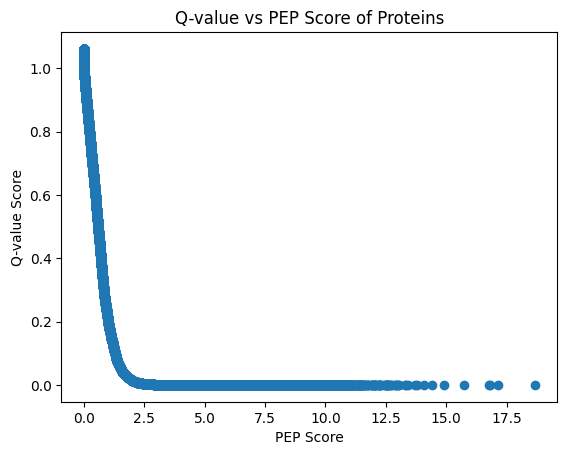

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged CSV file into a pandas DataFrame
data = pd.read_csv("MergedHumanProteome-ClassicNoGroupingNoRemapwithScore.csv")

# Create a scatter plot of q-value vs length
plt.scatter(data["Score"], data["Q-value"])
plt.title('Q-value vs PEP Score of Proteins')
plt.xlabel("PEP Score")
plt.ylabel("Q-value Score")
plt.show()

In [24]:
df = pd.read_csv('MergedHumanProteome-ClassicNoGroupingNoRemapwithScore.csv')

# filter for Q-value < 0.01
df_filtered = df[df['Q-value'] < 0.01]

print(df_filtered)
df_filtered.to_csv('MergedHumanProteome-ClassicNoGroupingNoRemapQ-valuefilterwithScore.csv', index=False)

      Unnamed: 0   Q-value Protein Type Protein Uniprot Protein Label  \
0              0  0.000535           sp          P35527    K1C9_HUMAN   
2              1  0.000535           sp          P35908    K22E_HUMAN   
4              2  0.000535           sp          P67809   YBOX1_HUMAN   
6              3  0.000535           sp          P09972   ALDOC_HUMAN   
8              4  0.000535           sp          P14550   AK1A1_HUMAN   
...          ...       ...          ...             ...           ...   
6957        3764  0.009378           sp          Q9H5K3   SG196_HUMAN   
6959        3765  0.009644      REV__sp          A6NL88   SHSA7_HUMAN   
6961        3766  0.009644           sp          Q8N6Q8   MET25_HUMAN   
6963        3768  0.009906           sp          Q5SXM2   SNPC4_HUMAN   
6965        3769  0.009906           sp          Q0VF96   CGNL1_HUMAN   

          Score                                      Protein names  Length  \
0     18.661526  Keratin, type I cytoskeletal

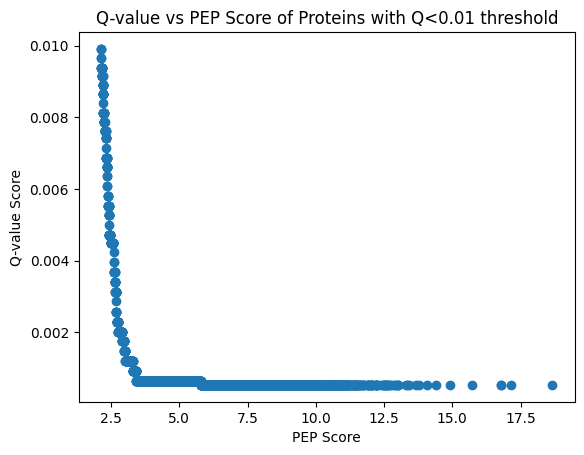

In [25]:
# Load the merged CSV file into a pandas DataFrame
data = pd.read_csv("MergedHumanProteome-ClassicNoGroupingNoRemapQ-valuefilterwithScore.csv")

# Create a scatter plot of q-value vs length
plt.scatter(data["Score"], data["Q-value"])
plt.title('Q-value vs PEP Score of Proteins with Q<0.01 threshold')
plt.xlabel("PEP Score")
plt.ylabel("Q-value Score")
plt.show()

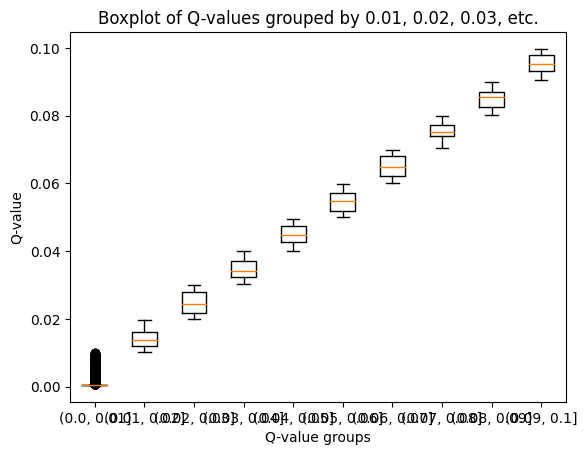

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# read csv file into a dataframe
data = pd.read_csv("MergedHumanProteome-ClassicNoGroupingNoRemapwithScore.csv")

# create bins based on the q-value column
bins = pd.cut(df['Q-value'], bins=[0.01*i for i in range(11)])

# group the q-values by the bins
groups = df.groupby(bins)['Q-value']

# create a boxplot of the q-values for each group
fig, ax = plt.subplots()
ax.boxplot([group[1] for group in groups], labels=[str(group[0]) for group in groups])
ax.set_xlabel('Q-value groups')
ax.set_ylabel('Q-value')
ax.set_title('Boxplot of Q-values grouped by 0.01, 0.02, 0.03, etc.')
plt.show()

In [3]:
df = pd.read_csv('ProteinIDs_classic_no_grouping_no_remap.csv')

# Split the column by '|', but only keep the first two splits if there are more than 2
split_col = df['Protein IDs'].str.split('|', n=2, expand=True)

# Rename the new columns
split_col.columns = ['Protein Type', 'Protein Uniprot', 'Protein Label']

# Concatenate the original DataFrame and the new columns
new_df = pd.concat([df['Q-value'], split_col], axis=1)
print(new_df)
new_df.to_csv('SeparateProteinIDs_classic_no_grouping_no_remap.csv')

        Q-value Protein Type        Protein Uniprot Protein Label
0      0.000535           sp                 P35527    K1C9_HUMAN
1      0.000535           sp                 P35908    K22E_HUMAN
2      0.000535           sp                 P67809   YBOX1_HUMAN
3      0.000535           sp                 P09972   ALDOC_HUMAN
4      0.000535           sp                 P14550   AK1A1_HUMAN
...         ...          ...                    ...           ...
55581  1.060459           sp               Q9HD23-2    MRS2_HUMAN
55582  1.060459           sR  single_ribo2783_HUMAN          None
55583  1.060496      REV__sp                 O14598    VCY1_HUMAN
55584  1.060533      REV__sR        single_ribo3311          None
55585  1.060570      REV__sp                 Q9NY25   CLC5A_HUMAN

[55586 rows x 4 columns]


In [ ]:
import csv

# open the CSV file
with open('MergedHumanProteome-SavitskiNoRemapwithScore.csv', 'r') as file:
    reader = csv.reader(file)
    # skip header row
    next(reader)
    # initialize max_q to negative infinity
    max_q = float('-inf')
    # loop through each row in the file
    for row in reader:
        # extract the Q-value from the row
        q_value = float(row[1])
        # update max_q if necessary
        if q_value > max_q:
            max_q = q_value

print("The highest Q-value in the file is:", max_q)

In [ ]:
# read in the two csv files
csv1 = pd.read_csv('SeparateProteinIDs_classic_no_grouping_no_remap.csv')
csv2 = pd.read_csv('UniprotHumanProteome.csv')

# merge the two csv files on a common column
merged_csv = pd.merge(csv1, csv2, on='Protein Uniprot')

print(merged_csv)
# save the merged csv to a file
merged_csv.to_csv('MergedHumanProteome-SavitskiNoRemapwithScore.csv', index=False)

REV__sp    23177
sp         21577
REV__sR     2714
sR          2665
REV__pI     2123
pI          2105
sU           441
REV__sU      427
nC           188
REV__nC      169
Name: Protein Type, dtype: int64


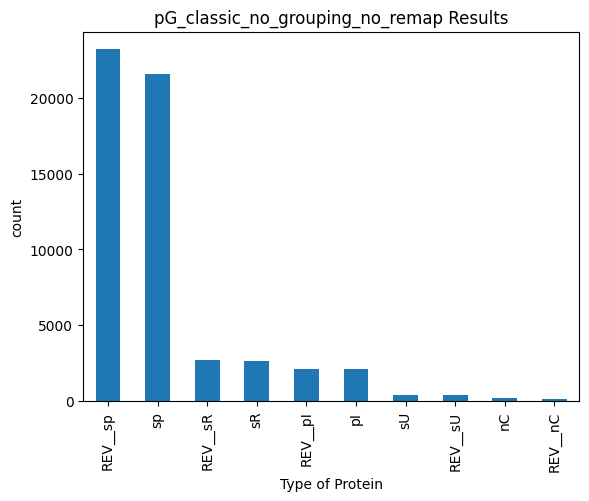

In [13]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('SeparateProteinIDs_classic_no_grouping_no_remap.csv')

# Count the number of occurrences of each unique string in the 'Column 1' column
value_counts = df['Protein Type'].value_counts()

# Print the value counts
print(value_counts)

# Plot the value counts as a bar chart
value_counts.plot(kind='bar')
plt.title('pG_classic_no_grouping_no_remap Results')
plt.xlabel('Type of Protein')
plt.ylabel('count')
plt.show()

Protein Type
REV__pI       2
REV__sR       1
REV__sp      33
sp         3734
Name: Protein Type, dtype: int64


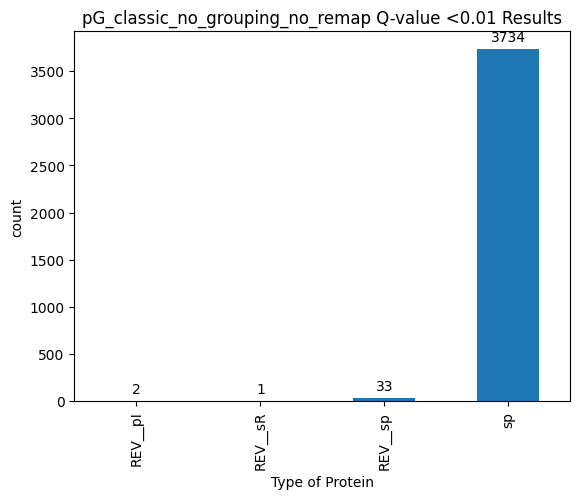

In [17]:
df = pd.read_csv('SeparateProteinIDs_classic_no_grouping_no_remap.csv')

# filter for Q-value < 0.01
df_filtered = df[df['Q-value'] < 0.01]

# group by protein type and count the number of each type
protein_count = df_filtered.groupby('Protein Type')['Protein Type'].count()

# print the protein count
print(protein_count)

# Plot the value counts as a bar chart
protein_count.plot(kind='bar')
plt.title('pG_classic_no_grouping_no_remap Q-value <0.01 Results')
plt.xlabel('Type of Protein')
plt.ylabel('count')
# add labels to the bars
for i, count in enumerate(protein_count):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()
          
          

In [6]:
# filter for Q-value >= 0.01
df_above_cutoff = df[df['Q-value'] >= 0.01]

# group by protein type and count the number of each type above the Q-value cutoff
protein_count_above = df_above_cutoff.groupby('Protein Type')['Protein Type'].count()

# print the protein counts
print("Protein count below Q-value cutoff:")
print(protein_count)
print("\nProtein count above Q-value cutoff:")
print(protein_count_above)

Protein count below Q-value cutoff:
Protein Type
REV__pI       2
REV__sR       1
REV__sp      33
sp         3734
Name: Protein Type, dtype: int64

Protein count above Q-value cutoff:
Protein Type
REV__nC      169
REV__pI     2121
REV__sR     2713
REV__sU      427
REV__sp    23144
nC           188
pI          2105
sR          2665
sU           441
sp         17843
Name: Protein Type, dtype: int64


# Q-value filter CUTOFF <0.01

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_27967/3066059785.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['REV__pI', 'REV__sR','REV__nC', 'REV__sU', 'pI', 'sR', 'nC','sU'], 'Microprotein')
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_27967/3066059785.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['sp', 'REV__sp'], 'sp'

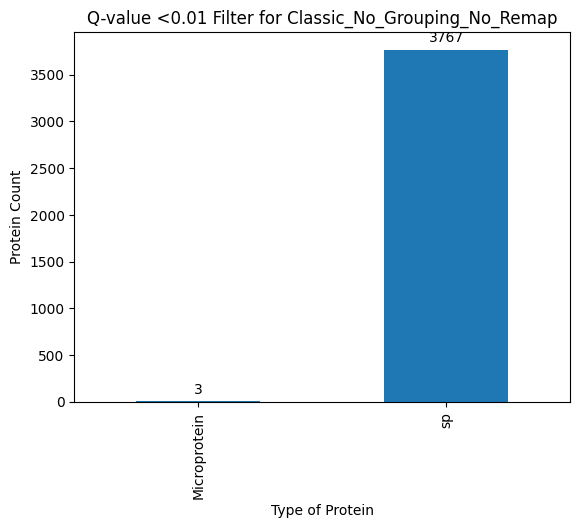

In [11]:
# read in the CSV file with the separated protein IDs
df = pd.read_csv('SeparateProteinIDs_classic_no_grouping_no_remap.csv')

# filter for Q-value < 0.01
df_below_cutoff = df[df['Q-value'] < 0.01]

# combine counts for REV__pI, REV__sR, REV__nC, REV__sU, pI, sR, nC, sU as 'microproteins'
df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['REV__pI', 'REV__sR','REV__nC', 'REV__sU', 'pI', 'sR', 'nC','sU'], 'Microprotein')

# combine counts for sp and REV__sp as 'sp'
df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['sp', 'REV__sp'], 'sp')

# group by protein type and count the number of each type below the Q-value cutoff
protein_count_below = df_below_cutoff.groupby('Protein Type')['Protein Type'].count()

# plot the histogram
protein_count_below.plot(kind='bar')
plt.title('Q-value <0.01 Filter for Classic_No_Grouping_No_Remap')
plt.xlabel('Type of Protein')
plt.ylabel('Protein Count')
# add labels to the bars
for i, count in enumerate(protein_count_below):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()

# No Q-value Filter

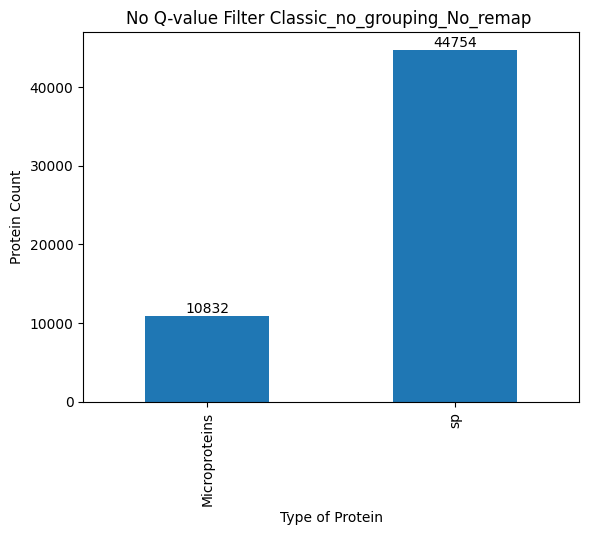

In [16]:
# read in the CSV file with the separated protein IDs
df = pd.read_csv('SeparateProteinIDs_classic_no_grouping_no_remap.csv')

# combine counts for REV__pI, REV__sR, REV__nC, REV__sU, pI, sR, nC, sU as 'microproteins'
df['Protein Type'] = df['Protein Type'].replace(['REV__pI', 'REV__sR', 'REV__nC', 'REV__sU', 'pI', 'sR', 'nC', 'sU'], 'Microproteins')

# combine counts for sp and REV__sp as 'sp'
df['Protein Type'] = df['Protein Type'].replace(['sp', 'REV__sp'], 'sp')

# group by protein type and count the number of each type
protein_count = df.groupby('Protein Type')['Protein Type'].count()

# plot the histogram
protein_count.plot(kind='bar')
plt.title('No Q-value Filter Classic_no_grouping_No_remap ')
plt.xlabel('Type of Protein')
plt.ylabel('Protein Count')

# add labels to the bars
for i, count in enumerate(protein_count):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

# Load the training data in SVMLight format
X_train, y_train = load_svmlight_file("training_data.txt")

# Split the training data into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train a linear SVM model using pairwise ranking loss
svm = LinearSVC(loss="hinge")
svm.fit(X_train, y_train)

# Evaluate the model on the validation set
score = svm.score(X_val, y_val)
print("Validation set accuracy:", score)